In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


%matplotlib inline 

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


$$ 
\begin{align*}
    \bar{N} &= N = \int_{0}^{\infty} \bar{n}(\epsilon) \mathcal{D}(\epsilon) d\epsilon \\ 
    &= \frac{V(2m)^{3/2}}{2\pi^2 \hbar^3} \int_{0}^{\infty} \frac{\sqrt{\epsilon} d\epsilon}{e^{\beta(\epsilon-\mu)} + 1}
\end{align*}
$$

/tmp/ipykernel_8515/3970936078.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(x) / (np.exp((x - mu) / T) + 1)
/tmp/ipykernel_8515/3970936078.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(x) / (np.exp((x - mu) / T) + 1)
/tmp/ipykernel_8515/3970936078.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = quad(I, np.float128(0), np.inf, args=(T, mu))
/tmp/ipykernel_8515/3970936078.py:2: RuntimeWarning: overflow encountered in exp
  return np.sqrt(x) / (np.exp((x - mu) / T) + 1)


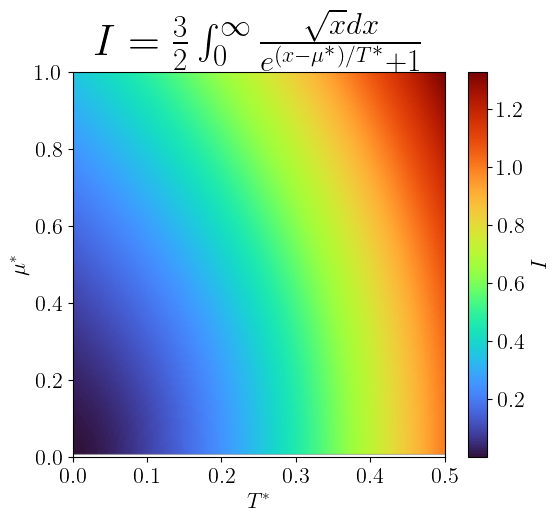

In [60]:
def I(x, T, mu):
    return np.sqrt(x) / (np.exp((x - mu) / T) + 1)

def compute_integral(T, mu):
    T = np.float128(T) 
    mu = np.float128(mu) 

    result, error = quad(I, np.float128(0), np.inf, args=(T, mu))
    return result

N_mu = 3 * 50
N_T = 3 * 50

mu_vals = np.linspace(0, 1, N_mu)
T_vals = np.linspace(0, 0.5, N_T)

I_vals = np.zeros((N_T, N_mu))

for i, T in enumerate(T_vals):
    for j, mu in enumerate(mu_vals):
        if(T == 0): 
            mu = 1.0
        I_vals[i, j] = (3/2) * compute_integral(T, mu)

fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)

im0 = ax.imshow(I_vals, origin="lower", extent=[0, T_vals.max(), 0, mu_vals.max()], aspect="auto", cmap="turbo")

fig.colorbar(im0, ax=ax, label=r"$I$")

ax.set_xlabel(r"$T^{*}$")
ax.set_ylabel(r"$\mu^{*}$")

ax.set_title(r"$I = \frac{3}{2} \int_{0}^{\infty}\frac{\sqrt{x}dx}{e^{(x-\mu^{*})/T^{*}}+1}$", fontsize=32)

plt.savefig(f"ideal_fermi_gas_integral.png", dpi=300, bbox_inches="tight")
plt.show()